# Assignment 1 - Problem Solving Task

|||
|-|-|
|**Course:**|MXB261 - Modelling and Simulation Science|
|**Instructor:**|Dr. Maria Kleshnina|
|**Student Name:**|Oliver Stewart|
|**Student Number:**|n11588608|
|**Due:**|23:59 on Friday of Week 6 (29 August 2025)|

---

## Part 1 - A Biased Random Walk

For this part there are a few requirements:

- Must include a function, we'll name this function `simulate`, accepting arguments `N` (the number of particles), `P` (the starting position 1 or 'rand'), and `swe` (a list for the probabilities of a particle moving in either direction: South, West and East **Note: It looks like the particle cannot move North**)
- The "play area" for the simulation is a 2D, 99$\times$99 grid ($x = (-50, 50], y =(-50, 50]$). This grid size will use a constant and wont be hard coded.
- If particles colide vertically (a particle hits another when moving south) the moving particle will stop it's simulation.
- If particles colide horizontally (a particle hits another when moving east or west) the particle will reattempt a move until one is sucessful or it's simulation stops.
- If a particle colides with the South border (it tries to move to a position $<y=-49$) the moving particle will stop it's simulation.
- If a particle attempts to move to a position $<x=-49$ or $>x=50$ the moving particle will wrap around to the other side of the "play area".
- The `simulate` function will return an array of length `N` containing elements with `x` and `y` coordinates.
- There will also be a function `graph` which will accept values `N` and `P` and graph a 2x2 grid of histograms, one for each of `sew` =
$$s=e=w=\frac13$$
$$s=\frac23,e=\frac16,w=\frac16$$
$$s=\frac35,e=\frac1{10},w=\frac3{10}$$
$$s=\frac35,e=\frac3{10},w=\frac1{10}$$
- The `graph` function will be used to graph a 2x2 grid, one for each of `N`, `P` pairs:
$$P=1,N=100$$
$$P=1,N=200$$
$$P=\text{rand},N=100$$
$$P=\text{rand},N=200$$

Below is the full implementation in MATLAB:

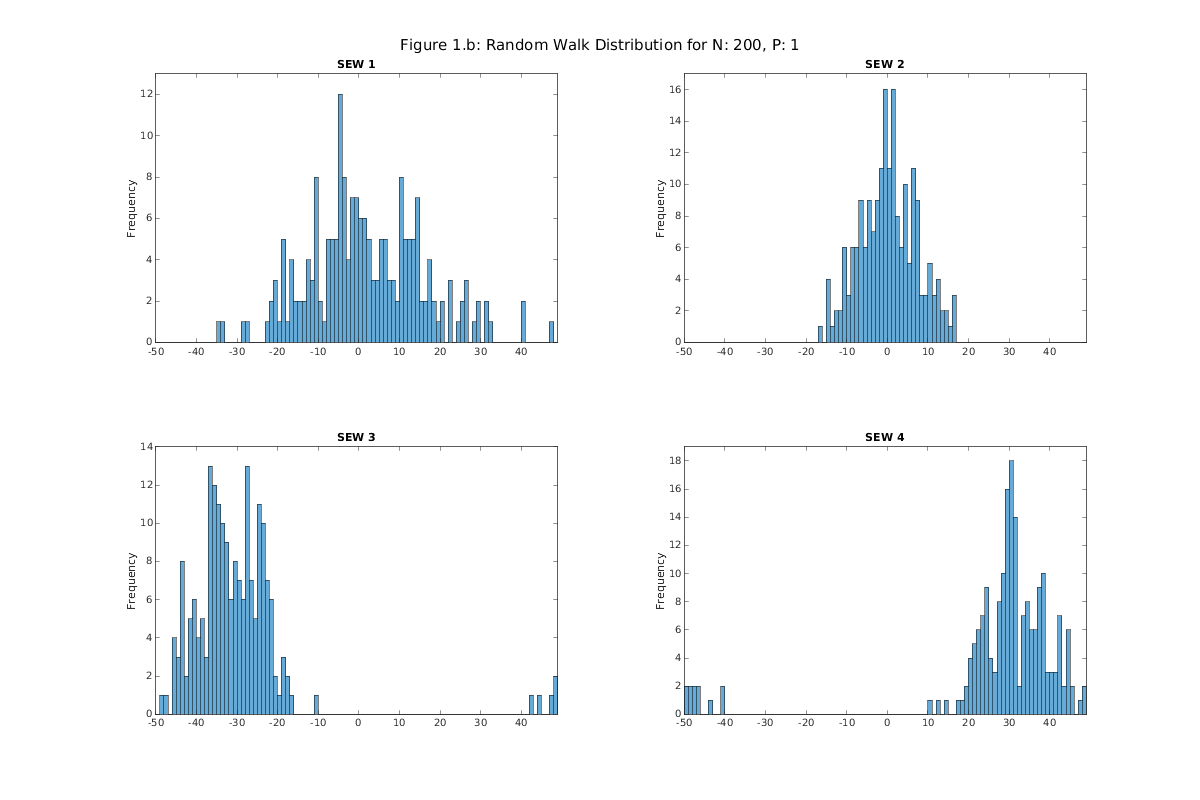

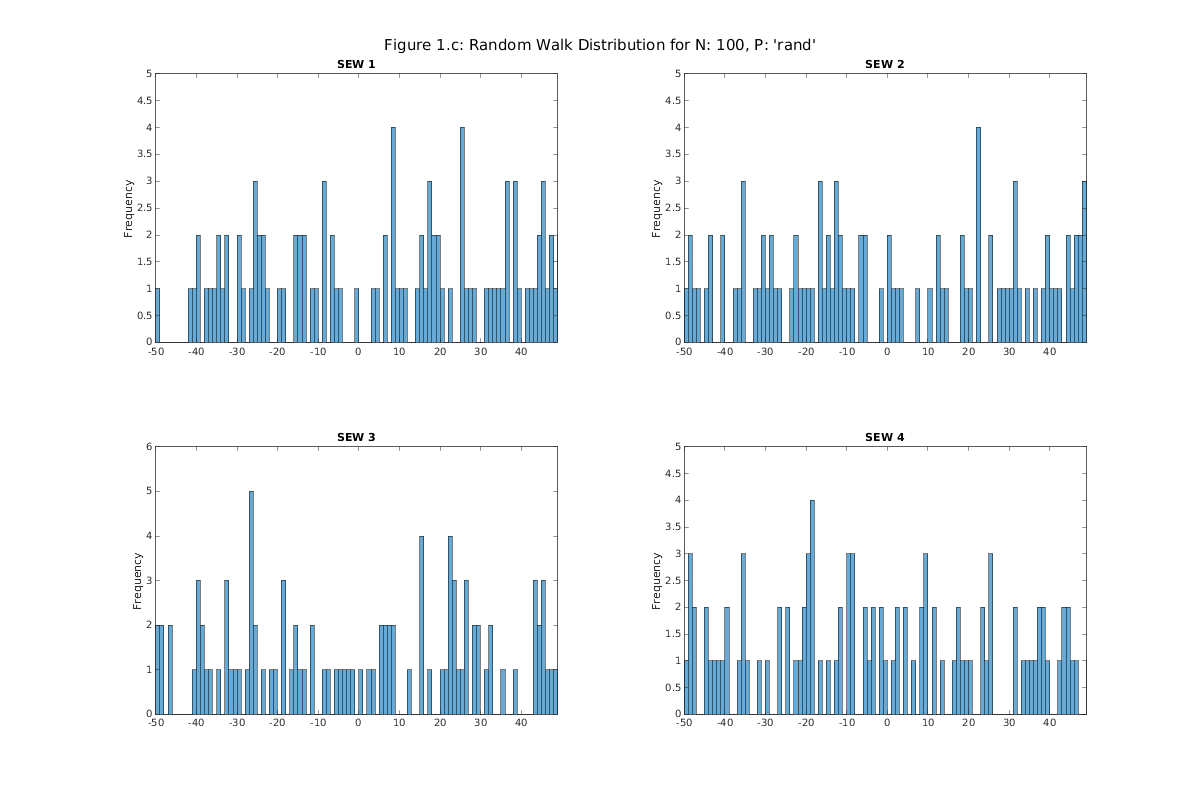

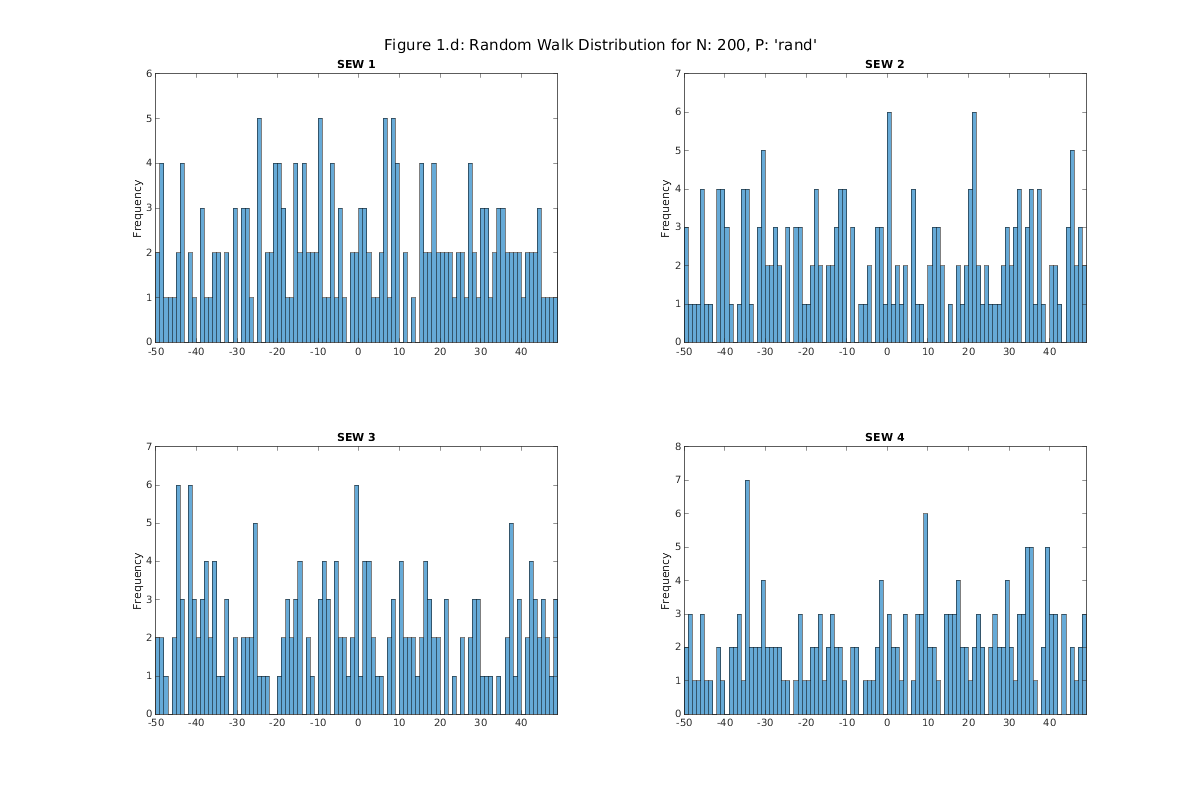

In [105]:
function xys = simulate(N, P, sew)
% simulate : Function to simulate a biased random walk
%
% N   : arg, the number of particles to simulate
% P   : arg, the starting postion, can be an enum of 1 or 'rand'
% sew : arg, array of size 3, indicating the probabilities of any 
%      particle navigating South, East, and West (no North)
%
% particles : return value, an array of size N containing x, y 
%      coordinates for the final position of the simulated particles

    % change in x and y with each direction 
    %          S;       E;       W
    dxdys = [[0, -1]; [1, 0]; [-1, 0]];

    % grid size is maxxy x maxxy, e.g.: maxxy = 99 would result in a 99x99 grid
    maxxy = 99;
    
    % calculate the cumulative distribution function
    cdf = cumsum(sew);
    
    % initialise
    xys = zeros(N, 2); % rows are particles, columns are x-posn, y-posn
    stopped = false;
    
    for i = 1:N
        if P == 1
            xys(i, :) = [ceil(maxxy / 2), maxxy];
        end
        if P == 'rand'
            xys(i, :) = [randi([0, maxxy]), maxxy];
        end
        while stopped == false
            % use a uniform random number to sample PMF
            u = rand;
            dirn_idx = find(cdf >= u, 1);
        
            % find the to-be x and y position
            dxdy = dxdys(dirn_idx, :);
            tobexy = xys(i, :) + dxdy;
            
            % colision logic
            if tobexy(1) == -1 % colide with West border, wrap to East
                tobexy(1) = maxxy;
            end

            if tobexy(1) == maxxy + 1 % colide with East border, wrap to West
                tobexy(1) = 0;
            end
            
            if tobexy(2) == -1 % colide with South border
                stopped = true;
                continue;
            end

            for ii = 1:N
                if i == ii | ~isequal(tobexy, xys(ii, :))
                    continue;
                end
                if dxdy == dxdys(1, :) % colide vertically
                    tobexy = xys(i, :); % reset move
                    stopped = true; % stop outer while loop
                    break;
                end
                % default will trigger on coliding and not coliding vertically, coliding horizontally
                tobexy = xys(i, :); % reset move without stopping, regen. move
                break;
            end
        
            % update stored of results
            xys(i, :) = tobexy;
        end
        stopped = false;
    end

    for i = 1:N
        xys(i, :) = xys(i, :) - ceil(maxxy / 2);
    end
end

function graph(N, P, figurePrefix)
% graph : Function to graph simulated random walks performed by the simulate function, 
%     will plot the result of simulate N, P, for each of sews:
%        1/3, 1/3, 1/3;
%        2/3, 1/6, 1/6;
%        3/5, 1/10, 3/10;
%        3/5, 3/10, 1/10;
%
% N            : arg, the number of particles to simulate
% P            : arg, the starting postion, can be an enum of 1 or 'rand'
% figurePrefix : arg, the prefix for the figure title

    sews = [
        1/3, 1/3, 1/3;
        2/3, 1/6, 1/6;
        3/5, 1/10, 3/10;
        3/5, 3/10, 1/10;
    ];
    
    figure('Units','pixels','Position',[100 100 1200 800]);
    for i = 1:size(sews,1)
        sew = sews(i,:);
        final_positions = simulate(N, P, sew);
        x_coords = final_positions(:,1);
        
        subplot(2,2,i);
        h = histogram(x_coords, 'BinEdges', -50:50);
        
        ax = gca;
        ax.XAxisLocation = 'origin';
        
        title(sprintf('SEW %d', i));
        ylabel('Frequency');
        
        xlim([-50 49]);
        ylim([0 max(h.Values)+1]);
    end
    sgtitle(sprintf('%s: Random Walk Distribution for N: %d, P: %s', figurePrefix, N, mat2str(P)));
end

% Figures 1.a-b: Random Walk Distribution for N, P
graph(100, 1, 'Figure 1.a');
graph(200, 1, 'Figure 1.b');
graph(100, 'rand', 'Figure 1.c');
graph(200, 'rand', 'Figure 1.d');

### Part 1 - A Biased Random Walk - Discussion Questions

> ***1.** compare the effect of having a single starting point or random starting points
on the distribution of column heights.*

Having a single starting point for the random walks at (0, 50) compared to a randomly assigned starting point for every random walk from $(-50, 50]$ has an obvious impact on the final distribution of the final distribution. The random walks that start at (0, 50) show normal distributions with different skews and domains that are defined by the direction of the different sew arguments, while the randomlly assigned starting points show random distributions with no real statistically significant diviations from plot to plot exists.

> ***2.** discuss how adding more particles effects the distribution of column height.*

Adding more particles, as expected, increases the column height, as more particles are added to the simulation more space is used up. As a side note to the question, increasing the number of particles also increases the *definition* of the distributions for both `P` $=$ `1` and `P` $=$ `'rand'`.

> ***3.** mention whether the distributions for the particles final position looks like
any other distributions youâ€™ve encountered in MXB261.*

The distribution of the first two plots, where `P` $=$ `1` show what appears to be normally distributed data, where as the last two plots, where `P` $=$ `'rand'` show what appears to be randomly distributed data. This holds true for these smaller simulations, however, with more particles this may not be the case.

## Part 2 - Understanding KL Divergence Through Sampling

This part has the following requirements:

- Define the true Poisson PMF $\lambda = 4$, $k = 0:15$ and renormalise so $\sum_{i=0}^{15} f(i) = 1$
- Get the true Poisson CDF
- Implement inverse transform sampling to generate 100 samples from the CDF for sample sizes: $\{10, 25, 50, 100, 175, 250\}$ for each experiment:
  - Calculate the empirical PMF
  - Compute mean and standard error for the KL Divergence between the true and empirical pmf
- Make two visualisations: *KL Divergence by Sample Size* and *True PMF vs. Empirical PMF per. sample size*

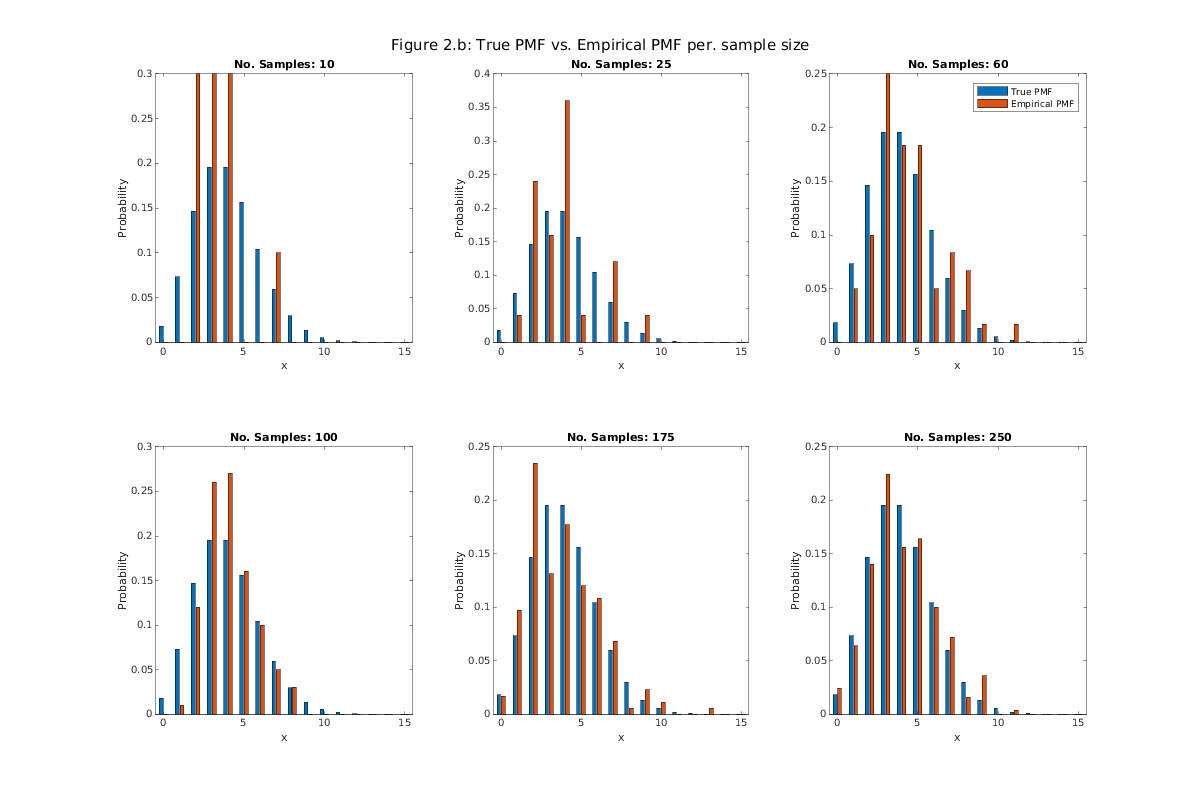

In [108]:
% Define the true pmf
lambda = 4;
k = 0:15;
Prob_k = (lambda .^ k * exp(-lambda)) ./ factorial(k);
true_pmf = Prob_k / sum(Prob_k);

% Sampling Implementation
true_cdf = cumsum(true_pmf);

function sampled = sample(N, true_cdf)
% sampled : 
%
% N        : arg, the number of samples to sample from the cdf
% true_cdf : arg, the cdf to sample from
    sampled = zeros(N, 1);
    for i = 1:N
        % use a uniform random number to sample PMF
        u = rand;
        sampled(i, 1) = find(true_cdf >= u, 1, 'first') - 1; % -1 cause MATLAB indexes from 1, not 0 like every other language
    end
end

% KL Divergence Calculation
sample_sizes = [10, 25, 60, 100, 175, 250];
kld_mean = zeros(6, 1);
kld_se = zeros(6, 1);
example_pmfs = zeros(6, 16);

for i = 1:6
    kl_divergences = zeros(100, 1);
    for ii = 1:100
        curr_sample = sample(sample_sizes(i), true_cdf);
        counts = histcounts(curr_sample, 0:16);
        empirical_pmf = counts ./ sum(counts);
        kl_divergences(ii, 1) = sum(true_pmf .* log(true_pmf ./  max(empirical_pmf, 1e-10)));% avoid numerical issues with log(0)
        if ii == 1
            example_pmfs(i, :) = empirical_pmf; % sample pmf for plotting
        end
    end

    kld_mean(i, 1) = mean(kl_divergences);
    kld_se(i, 1) = std(kl_divergences) / sqrt(100);
end

% Figure 2.a: KL Divergence by Sample Size
figure;
errorbar(sample_sizes, kld_mean(:, 1), kld_se(:, 1));
sgtitle('Figure 2.a: KL Divergence by Sample Size')
xlabel('Sample Size');
ylabel('KL Divergence Mean');

% Figure 2.b: True PMF vs. Empirical PMF per. sample size
figure('Units','pixels','Position',[100 100 1200 800]);
for i = 1:6  
    subplot(2,3,i);
    bar(0:15, [true_pmf(:), example_pmfs(i,:).'], 'grouped');
    
    title(sprintf('No. Samples: %d', sample_sizes(i)));
    xlabel('x')
    ylabel('Probability')

    if i == 3
        legend('True PMF','Empirical PMF');
    end
end
sgtitle('Figure 2.b: True PMF vs. Empirical PMF per. sample size');

### Part 2 - Understanding KL Divergence Through Sampling - Analysis

The above plots, *Figure 2.a* and *Figure 2.b* illustrate how the KL Divergence of the Empirical PMF compared to the True PMF decrease and approaches 0 (with $\text{KL Divergence} = 0$ indicating a perfect representation of the True PMF by the Empirical PMF) as more samples are taken from the "black box function" that generates samples according to the True PMF. This is expected as when very few samples are taken from the True PMF (e.g., ten), it is likely, parts of the PMF with very little probability are entirely missed and not represented in the smaller sample size; whereas, if more samples are taken, the likelihood that low probability outcomes of the "black box function" are represented in the larger sample size and can be accounted for correctly when approximating the True PMF.